#1

In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from statsmodels.graphics.mosaicplot import mosaic
import matplotlib.pyplot as plt 
from matplotlib import style
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc

In [81]:
credit_df = pd.read_csv('Credit_card.csv')
credit_df.head()


,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2


In [82]:
credit_df_labels = pd.read_csv('Credit_card_label.csv')
credit_df_labels.head()

,Ind_ID,label
0,5008827,1
1,5009744,1
2,5009746,1
3,5009749,1
4,5009752,1


In [83]:
credit_df = pd.concat([credit_df, credit_df_labels], axis = 1)
credit_df

,Ind_ID,GENDER,Car_Owner,Propert_Owner,CHILDREN,Annual_income,Type_Income,EDUCATION,Marital_status,Housing_type,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Type_Occupation,Family_Members,Ind_ID,label
0,5008827,M,Y,Y,0,180000.0,Pensioner,Higher education,Married,House / apartment,-18772.0,365243,1,0,0,0,NaN,2,5008827,1
1,5009744,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009744,1
2,5009746,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,NaN,-586,1,1,1,0,NaN,2,5009746,1
3,5009749,F,Y,N,0,NaN,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009749,1
4,5009752,F,Y,N,0,315000.0,Commercial associate,Higher education,Married,House / apartment,-13557.0,-586,1,1,1,0,NaN,2,5009752,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,F,N,Y,0,NaN,Commercial associate,Higher education,Married,House / apartment,-11957.0,-2182,1,0,0,0,Managers,2,5028645,0
1544,5023655,F,N,N,0,225000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10229.0,-1209,1,0,0,0,Accountants,1,5023655,0
1545,5115992,M,Y,Y,2,180000.0,Working,Higher education,Married,House / apartment,-13174.0,-2477,1,0,0,0,Managers,4,5115992,0
1546,5118219,M,Y,N,0,270000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-15292.0,-645,1,1,1,0,Drivers,2,5118219,0


In [84]:
credit_df.columns

Index(['Ind_ID', 'GENDER', 'Car_Owner', 'Propert_Owner', 'CHILDREN',
       'Annual_income', 'Type_Income', 'EDUCATION', 'Marital_status',
       'Housing_type', 'Birthday_count', 'Employed_days', 'Mobile_phone',
       'Work_Phone', 'Phone', 'EMAIL_ID', 'Type_Occupation', 'Family_Members',
       'Ind_ID', 'label'],
      dtype='object')

In [85]:
credit_dummy = pd.get_dummies(credit_df[['Type_Income', 'EDUCATION', 'Housing_type', 'Type_Occupation', 'Marital_status', 'GENDER', 'Car_Owner', 'Propert_Owner']])
credit_dummy

,Type_Income_Commercial associate,Type_Income_Pensioner,Type_Income_State servant,Type_Income_Working,EDUCATION_Academic degree,EDUCATION_Higher education,EDUCATION_Incomplete higher,EDUCATION_Lower secondary,EDUCATION_Secondary / secondary special,Housing_type_Co-op apartment,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,False,True,False,False,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
1,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
2,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
3,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
4,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,True,False,False,False,False,True,False,False,False,False,...,True,False,False,False,True,False,True,False,False,True
1544,True,False,False,False,False,False,True,False,False,False,...,False,False,True,False,True,False,True,False,True,False
1545,False,False,False,True,False,True,False,False,False,False,...,True,False,False,False,False,True,False,True,False,True
1546,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,True,True,False


In [86]:
credit_df = credit_df.drop(['Type_Income', 'EDUCATION', 'Housing_type', 'Type_Occupation', 'Marital_status', 'GENDER', 'Car_Owner', 'Propert_Owner',], axis = 1)

In [87]:
credit_df = pd.concat([credit_df, credit_dummy], axis=1)
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,True,False,False,False,False,True,False,True,False,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
3,5009749,0,NaN,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,NaN,-11957.0,-2182,1,0,0,0,2,...,True,False,False,False,True,False,True,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,True,False,True,False,True,False,True,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,True,False,False,False,False,True,False,True,False,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,False,False,False,True,False,True,True,False


In [88]:
credit_df['Annual_income'] = credit_df['Annual_income'].fillna(0)
credit_df

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_F,GENDER_M,Car_Owner_N,Car_Owner_Y,Propert_Owner_N,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,True,False,False,False,False,True,False,True,False,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
3,5009749,0,0.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,True,False,False,False,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0.0,-11957.0,-2182,1,0,0,0,2,...,True,False,False,False,True,False,True,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,True,False,True,False,True,False,True,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,True,False,False,False,False,True,False,True,False,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,False,False,False,True,False,True,True,False


In [89]:
credit_df.drop(['GENDER_F', 'Car_Owner_N', 'Propert_Owner_N'], axis = 1)

,Ind_ID,CHILDREN,Annual_income,Birthday_count,Employed_days,Mobile_phone,Work_Phone,Phone,EMAIL_ID,Family_Members,...,Type_Occupation_Security staff,Type_Occupation_Waiters/barmen staff,Marital_status_Civil marriage,Marital_status_Married,Marital_status_Separated,Marital_status_Single / not married,Marital_status_Widow,GENDER_M,Car_Owner_Y,Propert_Owner_Y
0,5008827,0,180000.0,-18772.0,365243,1,0,0,0,2,...,False,False,False,True,False,False,False,True,True,True
1,5009744,0,315000.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,True,False
2,5009746,0,315000.0,NaN,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,True,False
3,5009749,0,0.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,True,False
4,5009752,0,315000.0,-13557.0,-586,1,1,1,0,2,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1543,5028645,0,0.0,-11957.0,-2182,1,0,0,0,2,...,False,False,False,True,False,False,False,False,False,True
1544,5023655,0,225000.0,-10229.0,-1209,1,0,0,0,1,...,False,False,False,False,False,True,False,False,False,False
1545,5115992,2,180000.0,-13174.0,-2477,1,0,0,0,4,...,False,False,False,True,False,False,False,True,True,True
1546,5118219,0,270000.0,-15292.0,-645,1,1,1,0,2,...,False,False,True,False,False,False,False,True,True,False


Here I cleaned out some of the columns like gender f and gender m, so that only one needed to be displayed because in data terms, if they aren't gender f then they are most likely m
did the same with car owner, property owner etc


In [99]:
X = credit_df.drop('label', axis = 1)
y = credit_df [['label']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state = 42)

In [92]:
credit_df = credit_df.fillna(0)

In [100]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train) 
X_test = sc.fit_transform(X_test)

accuracy = {}

for x in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=x) 
    knn.fit(X_train, y_train) 

    y_pred_2 = knn.predict(X_test)
    
    accuracy[x] = knn.score(X_test, y_test)
print(accuracy)
    

C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please ch

{1: 0.875268817204301, 2: 0.886021505376344, 3: 0.8774193548387097, 4: 0.8795698924731182, 5: 0.8688172043010752, 6: 0.8924731182795699, 7: 0.8903225806451613, 8: 0.9032258064516129, 9: 0.9032258064516129, 10: 0.9053763440860215, 11: 0.9032258064516129, 12: 0.9075268817204301, 13: 0.9075268817204301, 14: 0.9075268817204301, 15: 0.9075268817204301, 16: 0.9075268817204301, 17: 0.9075268817204301, 18: 0.9075268817204301, 19: 0.9075268817204301}


C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [101]:
X = credit_df.drop('label', axis=1)
y = credit_df['label']
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [102]:
regression = LogisticRegression(random_state=2).fit(X_train, y_train)
y_predicted = regression.predict(X_test)

C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [103]:
regression.score(X_test, y_test)

0.9053763440860215

In [122]:
regression.coef_

array([[ 0.0023951 , -0.41709706, -0.00816142, -0.18251672, -0.94836174,
         0.        ,  0.05931174,  0.0338048 , -0.05546696,  0.53649324,
         0.0023951 , -0.10810642,  0.85991324, -0.42093812, -0.33347519,
         0.        ,  0.09757692, -0.08009071,  0.19915158, -0.10711537,
         0.02783075, -0.07221852,  0.22055979, -0.02403097, -0.01407316,
        -0.07921924,  0.08405175, -0.03601932,  0.15050086,  0.22528009,
        -0.03709837, -0.14250411, -0.03462187,  0.2517908 ,  0.10846174,
         0.01362951,  0.03572815,  0.02190225, -0.36106392, -0.07834372,
         0.02713471, -0.24218668,  0.21838469,  0.11083187, -0.23483754,
        -0.13182807,  0.18667374,  0.14865039,  0.09891447, -1.55972828,
        -1.26848234, -0.02229841,  0.02229841,  0.00206155, -0.00206155]])

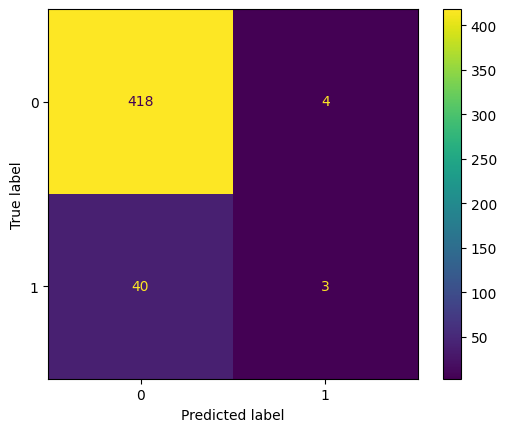

In [123]:
ConfusionMatrixDisplay.from_estimator(regression, X_test, y_test)

#2

In [118]:
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [119]:
model = LogisticRegression(random_state=42)
model.fit(X_resampled, y_resampled)

C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(random_state=42)

In [120]:
y_pred = model.predict(X_test)

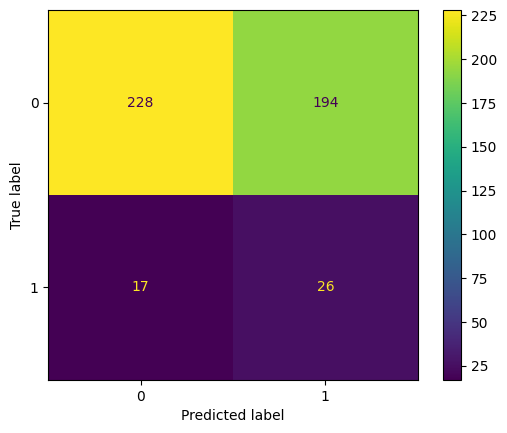

In [121]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)

KNN UNDERSAMPLING

In [111]:
from imblearn.under_sampling import ClusterCentroids

rus = ClusterCentroids(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [112]:
knn = KNeighborsClassifier(n_neighbors=x)
knn.fit(X_resampled, y_resampled)  


C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=19)

In [113]:
y_pred = knn.predict(X_test)

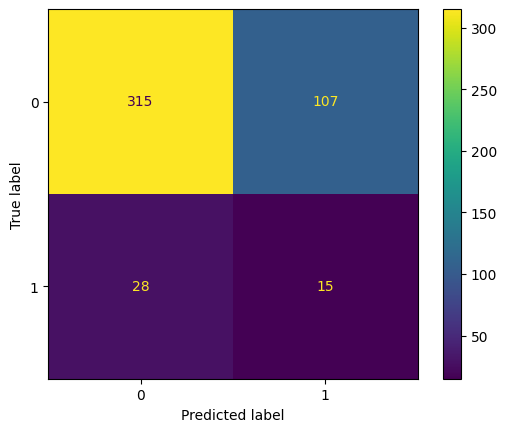

In [114]:
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)

I used undersampling as there were more 0s than 1s so we would rather have an undersample for this data. This made the data have more false postives in both, which made the data less accurate. But with this, is also created less true false negatives. Overall for both KNN and the logistic regression, this hurt the data as there was less truee postives.

#3

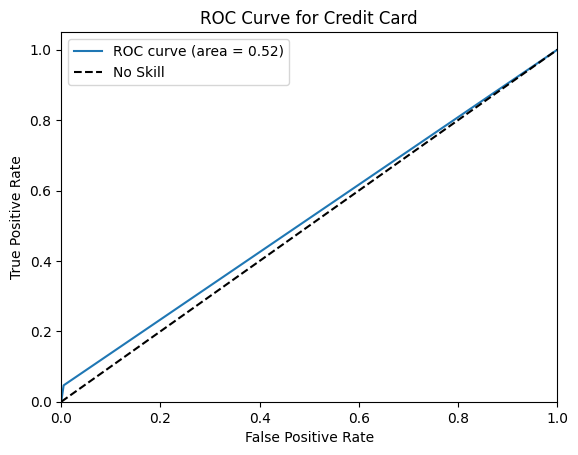

In [109]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)

plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Credit Card')
plt.legend()
plt.show()

In [108]:
score = roc_auc_score(y_test, y_pred)
score

np.float64(0.5208861457070428)

#4

In [106]:
from sklearn.svm import SVC

In [107]:
classifier = SVC(kernel='linear')
svc = SVC(kernel ='linear', C = 1)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
svc.score(X_test, y_test)

C:\Users\anthony\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9075268817204301

#5

In [ ]:
#outlier detection is the idea of finding points that are very far away from the mean and sometimes removing them so that the data doesn't become skewed. Some meathods for this is simply cleaning data and 
# and using types of sampling for it